In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [84]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
mnist = keras.datasets.mnist

In [19]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 27.4 MB/s 
     |████████████████████████████████| 1.6 MB 62.7 MB/s 


In [5]:
import kerastuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import softmax, relu 
from tensorflow.keras.models import  load_model

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array ,array_to_img , load_img

In [37]:
from tensorflow.keras import activations


In [39]:
from keras import Sequential
import keras

In [13]:
np.unique(y_train)
# label classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
x_train.shape

(60000, 28, 28)

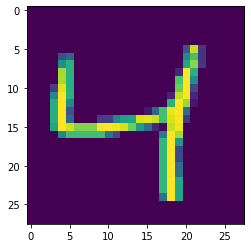

In [16]:
plt.imshow(x_train[2])

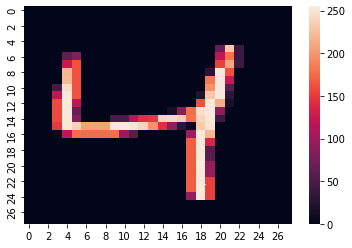

In [17]:
sns.heatmap(x_train[2])

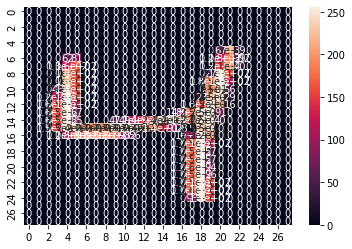

In [18]:
sns.heatmap(x_train[2],annot=True)


In [20]:
x_trainN = x_train/255.0
x_testN = x_test/255.0


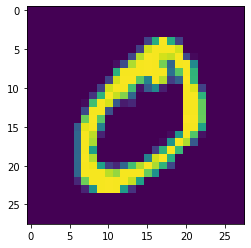

In [34]:
plt.imshow(x_trainN[1])

In [35]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train_r = x_trainN.reshape(len(x_trainN),28,28,1)
x_test_r = x_testN.reshape(len(x_testN),28,28,1)
x_train_r.shape,x_test_r.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
from tensorflow import keras

In [16]:
# by me
def build_model(hp):
  model = keras.Sequential([
      
      
      keras.layers.Conv2D(
          
          filters =hp.Int('conv_1',min_value=35,max_value=55,step=12),
          kernel_size =hp.Choice('conv_1',values = [3,5]),
          activation = 'relu',
          input_shape = (28,28,1)
          
      ),
      keras.layers.Conv2D(
          filters = hp.Int('conv_2',min_value=20,max_value=40,step=12),
          kernel_size = hp.Choice('conv_2',values=[3,5]),
          activation = 'relu'
          
      ),
      keras.layers.Flatten(),
      keras.layers.Dense(
          units = hp.Int('dense_unit',min_value =30,max_value=60,step=12),
          activation = 'relu'
          
      ),
      keras.layers.Dense(10 , activation='softmax')
  ])
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [24]:
# by krish sir
def build_modell(hp):

  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=35, max_value=80, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=20, max_value=40, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=90, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [25]:
tuner_search = RandomSearch(build_modell,objective='val_accuracy',max_trials=5,directory ='krishoutput',project_name = 'MNIST3')

In [26]:
tuner_search.search(x_train_r,y_train,epochs=5,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9898333549499512

Best val_accuracy So Far: 0.9901666641235352
Total elapsed time: 00h 04m 08s


In [37]:
model= tuner_search.get_best_models(num_models=1)[0]


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 51)        510       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 36)        45936     
                                                                 
 flatten (Flatten)           (None, 17424)             0         
                                                                 
 dense (Dense)               (None, 80)                1394000   
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 1,441,256
Trainable params: 1,441,256
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train_r,y_train,epochs=15,initial_epoch=5,validation_split=0.1)

Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0476 - val_accuracy: 0.9890
Epoch 8/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0377 - val_accuracy: 0.9903
Epoch 9/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0508 - val_accuracy: 0.9887
Epoch 10/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.0512 - val_accuracy: 0.9908
Epoch 11/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0575 - val_accuracy: 0.9897
Epoch 12/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0719 - val_accura

In [44]:
accu = pd.DataFrame(history.history)
accu

,loss,accuracy,val_loss,val_accuracy
0,0.024137,0.991963,0.037407,0.989833
1,0.015210,0.994815,0.047621,0.989000
2,0.011929,0.996148,0.037704,0.990333
3,0.008920,0.997093,0.050790,0.988667
4,0.007646,0.997185,0.051222,0.990833
5,0.005248,0.998407,0.057529,0.989667
6,0.005882,0.998037,0.071950,0.988333
7,0.004506,0.998722,0.064666,0.989500
8,0.006439,0.998111,0.058795,0.990167
9,0.003777,0.998722,0.056834,0.991167


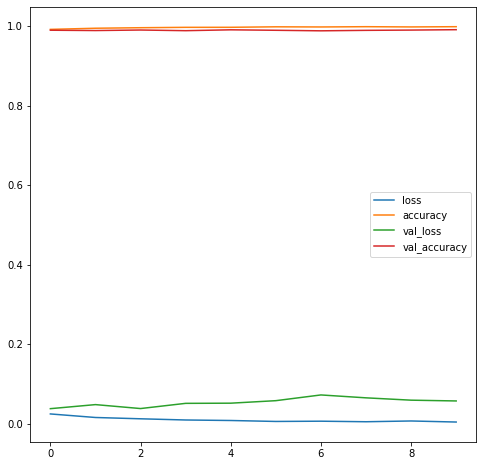

In [45]:
accu.plot(figsize=(8,8))

In [46]:
model.save('/content/drive/MyDrive/ANN/MNIST_model.h5')

In [48]:
model_loaded = load_model('/content/drive/MyDrive/ANN/MNIST_model.h5')

In [51]:
x_test_r.shape   # revised it

(10000, 28, 28, 1)

In [52]:
y_pred = model_loaded.predict(x_test_r)

In [60]:
# model.evaluate(y_test,y_pred)
y_predd = [np.argmax(i) for i in y_pred]

In [66]:
y_test[45]    #actual number 

5

In [65]:
y_predd[45]         # predicted number

5

In [69]:
import matplotlib.pyplot as plt

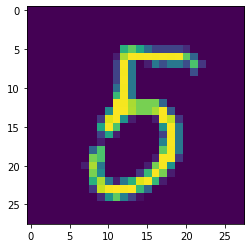

In [75]:
plt.imshow(x_test[45])

In [76]:
y_pred[854]
# probability result

array([1.0000000e+00, 3.2465040e-21, 3.4379740e-15, 2.0647411e-25,
       2.6648251e-27, 1.2294150e-24, 2.9659508e-20, 1.1377515e-17,
       2.1068908e-21, 3.5201540e-19], dtype=float32)

In [77]:
np.argmax(y_pred[854])
# actual predicted result

0

In [72]:
y_test[1]
# actual result match

2

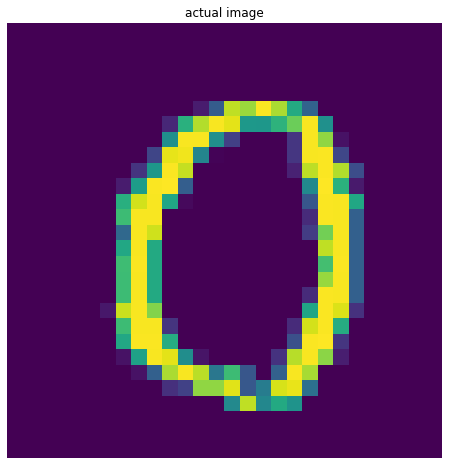

In [79]:
plt.figure(figsize=(8,8))
plt.imshow(x_test[854])
plt.axis('off')
plt.title('actual image')
plt.show()


In [81]:
match_result = pd.DataFrame({'actual':y_test,'predicted':y_predd})
match_result.head()

,actual,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [82]:
match_result['actual'].value_counts()
# actual value

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: actual, dtype: int64

In [83]:
match_result['predicted'].value_counts()
# predicted result

1    1141
2    1035
7    1029
3    1015
9     994
0     988
4     988
8     966
6     964
5     880
Name: predicted, dtype: int64

project completed 🥰😋